In [105]:
# Libary to import self-made libaries
import sys # https://stackoverflow.com/questions/4383571/importing-files-from-different-folder
sys.path.insert(1, r'C:\Users\ruw\Desktop\RA\Single-use-vs-multi-use-in-health-care\Libaries')

In [106]:
# Importing self-made libaries

import reload_lib as rl
import life_cycle_assessment_copy as lcc
import lcia_results as lr
import LCA_plots as lp


lib = [lcc, lp, lr]

In [108]:
# Path to where the code is stored
path = r'C:\Users\ruw\Desktop\RA\Single-use-vs-multi-use-in-health-care'
# Specifying the LCIA method
lcia_method = 'recipe'

ecoinevnt_paths = {'ev391apos' : r"C:\Users\ruw\Desktop\4. semester\EcoInvent\ecoinvent 3.9.1_apos_ecoSpold02\datasets",
                   'ev391consq' : r"C:\Users\ruw\Desktop\4. semester\EcoInvent\ecoinvent 3.9.1_consequential_ecoSpold02\datasets",
                   'ev391cutoff' : r"C:\Users\ruw\Downloads\ecoinvent 3.9.1_cutoff_ecoSpold02\datasets"}
system_path = [r'C:\Users\ruw\Desktop\RA\Single-use-vs-multi-use-in-health-care\Data\databases\case1.xlsx', 
                r'C:\Users\ruw\Desktop\RA\Single-use-vs-multi-use-in-health-care\Data\databases\case2.xlsx']

In [109]:
rl.reload_lib(lib)

flow_legend, file_name, sheet_name, save_dir, initialization, file_name_unique_process = lcc.initilization(path, lcia_method, ecoinevnt_paths, system_path)

Biosphere is already present in the project.
Ecoinvent 3.9.1 is already present in the project.
Extracted 1 worksheets in 0.06 seconds
Applying strategy: csv_restore_tuples
Applying strategy: csv_restore_booleans
Applying strategy: csv_numerize
Applying strategy: csv_drop_unknown
Applying strategy: csv_add_missing_exchanges_section
Applying strategy: normalize_units
Applying strategy: normalize_biosphere_categories
Applying strategy: normalize_biosphere_names
Applying strategy: strip_biosphere_exc_locations
Applying strategy: set_code_by_activity_hash
Applying strategy: link_iterable_by_fields
Applying strategy: assign_only_product_as_production
Applying strategy: link_technosphere_by_activity_hash
Applying strategy: drop_falsey_uncertainty_fields_but_keep_zeros
Applying strategy: convert_uncertainty_types_to_integers
Applying strategy: convert_activity_parameters_to_list
Applied 16 strategies in 3.92 seconds
Matching database: ev391consq
Applying strategy: link_iterable_by_fields


Writing activities to SQLite3 database:


Unlinked items after matching ev391consq: []
Applying strategy: link_iterable_by_fields
24 datasets
170 exchanges
0 unlinked exchanges
  
Wrote matching file to:
C:\Users\ruw\AppData\Local\pylca\Brightway3\single-use-vs-multi-use.0e7e263503916b8fcd098a9e51faa14f\output\db-matching-case1_consq-unlinked.xlsx


0% [########################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 01/16/2025 10:30:45
  Finished: 01/16/2025 10:30:45
  Total time elapsed: 00:00:00
  CPU %: 0.00
  Memory %: 1.98
Created database: case1_consq
[]
case1_consq is loaded into the database
Extracted 1 worksheets in 0.04 seconds
Applying strategy: csv_restore_tuples
Applying strategy: csv_restore_booleans
Applying strategy: csv_numerize
Applying strategy: csv_drop_unknown
Applying strategy: csv_add_missing_exchanges_section
Applying strategy: normalize_units
Applying strategy: normalize_biosphere_categories
Applying strategy: normalize_biosphere_names
Applying strategy: strip_biosphere_exc_locations
Applying strategy: set_code_by_activity_hash
Applying strategy: link_iterable_by_fields
Applying strategy: assign_only_product_as_production
Applying strategy: link_technosphere_by_activity_hash
Applying strategy: drop_falsey_uncertainty_fields_but_keep_zeros
Applying strategy: convert_uncertainty_types_to_integers
Applying strategy: co

Writing activities to SQLite3 database:


Unlinked items after matching ev391consq: [{'name': 'autoclave', 'amount': 0.0277777777777777, 'reference product': 'autoclave operation', 'location': 'GLO', 'unit': 'unit', 'type': 'technosphere', 'database': 'case2_consq'}]
Applying strategy: link_iterable_by_fields
23 datasets
125 exchanges
0 unlinked exchanges
  
Wrote matching file to:
C:\Users\ruw\AppData\Local\pylca\Brightway3\single-use-vs-multi-use.0e7e263503916b8fcd098a9e51faa14f\output\db-matching-case2_consq-unlinked.xlsx


0% [#######################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 01/16/2025 10:30:55
  Finished: 01/16/2025 10:30:55
  Total time elapsed: 00:00:00
  CPU %: 0.00
  Memory %: 2.02
Created database: case2_consq
[]
case2_consq is loaded into the database
case1_apos already exist
C:\Users\ruw\Desktop\RA\Single-use-vs-multi-use-in-health-care\results\case1_apos
case1_consq already exist
C:\Users\ruw\Desktop\RA\Single-use-vs-multi-use-in-health-care\results\case1_consq
case1_cut_off already exist
C:\Users\ruw\Desktop\RA\Single-use-vs-multi-use-in-health-care\results\case1_cut_off
case2_apos already exist
C:\Users\ruw\Desktop\RA\Single-use-vs-multi-use-in-health-care\results\case2_apos
case2_consq already exist
C:\Users\ruw\Desktop\RA\Single-use-vs-multi-use-in-health-care\results\case2_consq
case2_cut_off already exist
C:\Users\ruw\Desktop\RA\Single-use-vs-multi-use-in-health-care\results\case2_cut_off


In [113]:
rl.reload_lib(lib)

df, plot_x_axis_all, impact_categories, unique = {}, {}, {}, {}
for key, item in initialization.items():
    print(f"Perfoming LCA for {key}")
    # print(file_name_unique_process[key])
    df[key], plot_x_axis_all[key], impact_categories[key], unique[key] = lr.quick_LCIA(item, file_name[key], file_name_unique_process[key], sheet_name[key])
    print()

Perfoming LCA for case1_apos
Recipe is selected
Initialization is completed
DataFrame with nested lists written to Excel successfully.

Perfoming LCA for case1_consq
Recipe is selected
Initialization is completed
DataFrame with nested lists written to Excel successfully.

Perfoming LCA for case1_cut_off
Recipe is selected
Initialization is completed
DataFrame with nested lists written to Excel successfully.

Perfoming LCA for case2_apos
Recipe is selected
Initialization is completed
DataFrame with nested lists written to Excel successfully.

Perfoming LCA for case2_consq
Recipe is selected
Initialization is completed
DataFrame with nested lists written to Excel successfully.

Perfoming LCA for case2_cut_off
Recipe is selected
Initialization is completed
DataFrame with nested lists written to Excel successfully.



In [124]:
case_keys = [key for key in initialization.keys()]
leg_pos_scaled = {
    'case1' : 0.65,
    'case2' : 0.909
}

leg_pos_gwp = {
    'case1' : 0.652,
    'case2' : 0.652
}

y_min_gwp =  {
    case_keys[0] : -0.6,    #case1 apos
    case_keys[1] : -0.4,    #case1 consq    
    case_keys[2] : -0.6,      #case1 cut off
    case_keys[3] : -0.4,      #case2 apos
    case_keys[4] : -0.2,      #case2 consq
    case_keys[5] : -0.4       #case2 cut off
}

y_max_gwp =  {
    case_keys[0] : 1.6,     #case1 apos
    case_keys[1] : 1.4,     #case1 consq
    case_keys[2] : 1.6,       #case1 cut off
    case_keys[3] : 1.6,       #case2 apos
    case_keys[4] : 1.6,       #case2 consq
    case_keys[5] : 1.6        #case2 cut off
}

y_step_gwp =  {
    case_keys[0] : 0.2,     #case1 apos
    case_keys[1] : 0.2,     #case1 consq
    case_keys[2] : 0.2,     #case1 cut off
    case_keys[3] : 0.2,     #case2 apos
    case_keys[4] : 0.2,     #case2 consq
    case_keys[5] : 0.2      #case2 cut off
}


amount_of_uses = {
    'case1' : 513,
    'case2' : 250
}

y_max_be =  {
    case_keys[0] : [300, 700],  #case1 apos
    case_keys[1] : [225, 600],  #case1 consq
    case_keys[2] : [300, 650],  #case1 cut off
    case_keys[3] : [300, 650],  #case2 apos
    case_keys[4] : [375, 650],  #case2 conqs
    case_keys[5] : [300, 650]   #case2 cut off
}

y_step_be =  {
    case_keys[0] : [25, 50],    #case1 apos
    case_keys[1] : [25, 50],    #case1 consq
    case_keys[2] : [25, 50],    #case1 cut off
    case_keys[3] : [25, 50],    #case2 apos
    case_keys[4] : [25, 50],    #case2 consq
    case_keys[5] : [25, 50]     #case2 cut off
}

x_step_be =  {
    'case1' : 50,
    'case2' : 25
}

break_even_product = {
    'case1' : 'container',
    'case2' : 'electro surgery'
}

plot_structure = [
    leg_pos_scaled,
    leg_pos_gwp,
    y_min_gwp,
    y_max_gwp,
    y_step_gwp,
    amount_of_uses,
    y_max_be,
    y_step_be,
    x_step_be,
    break_even_product
]

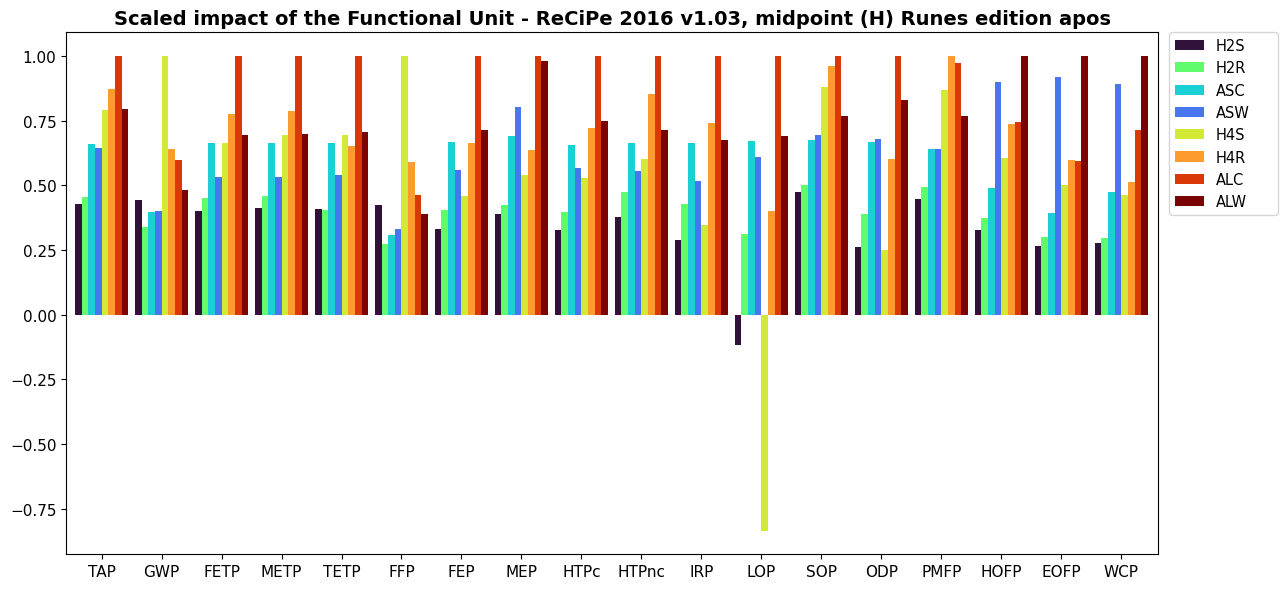

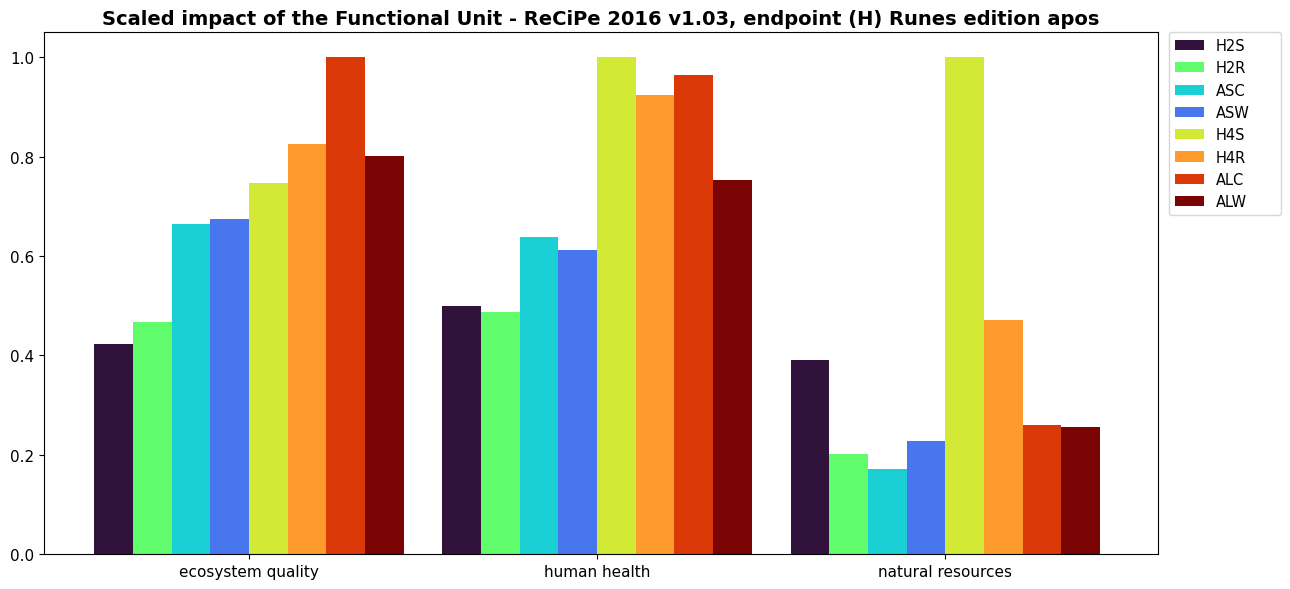

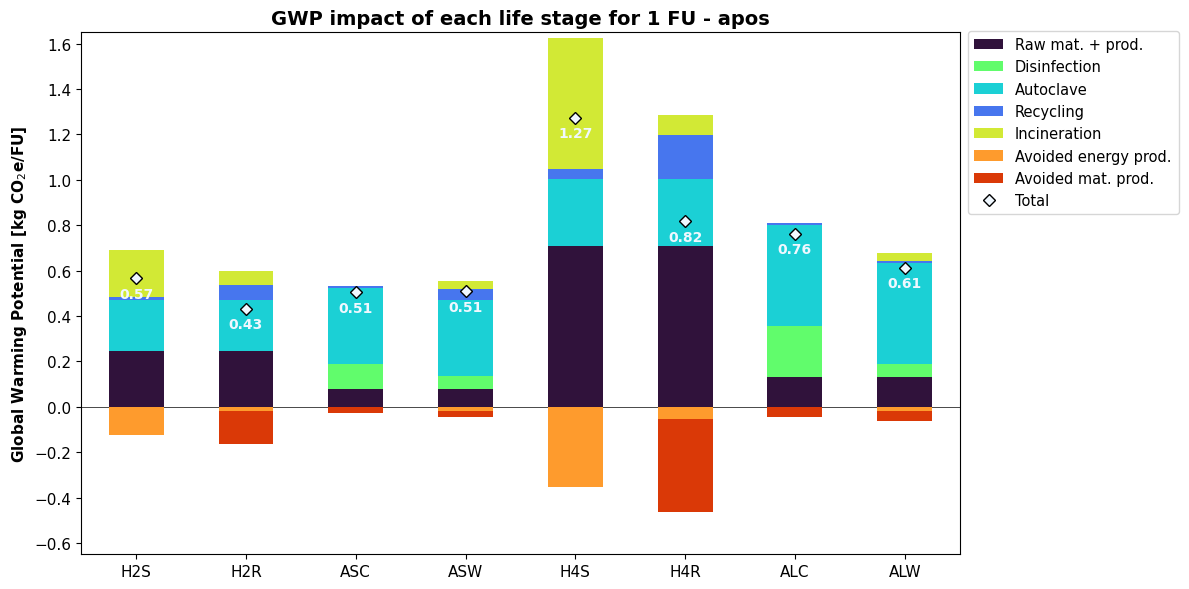

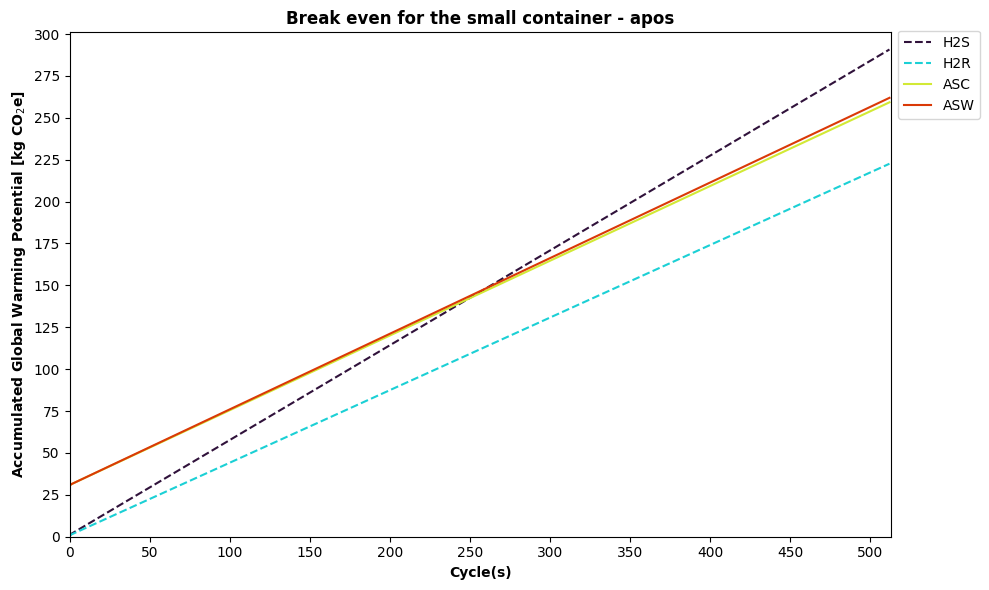

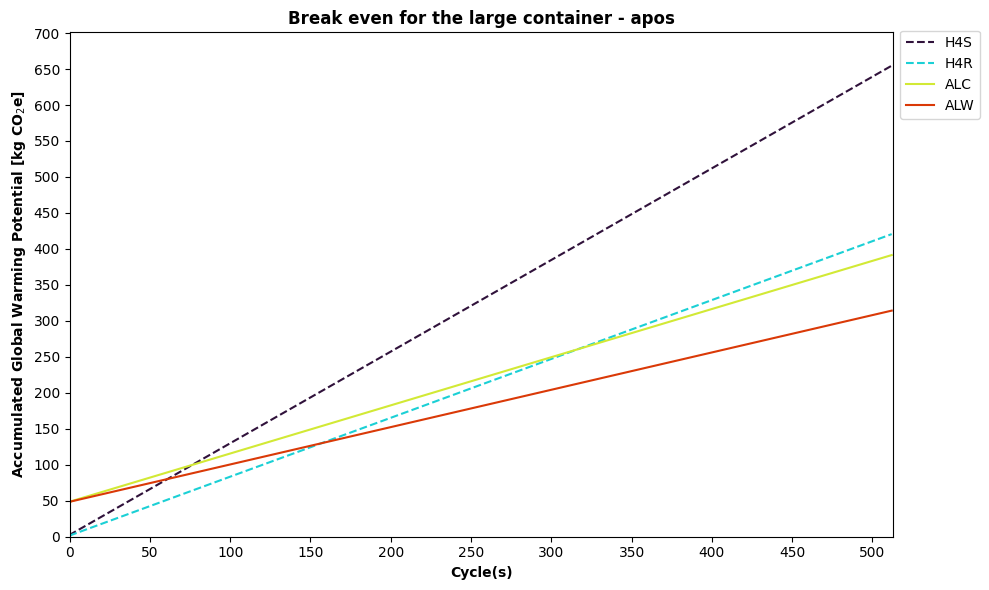

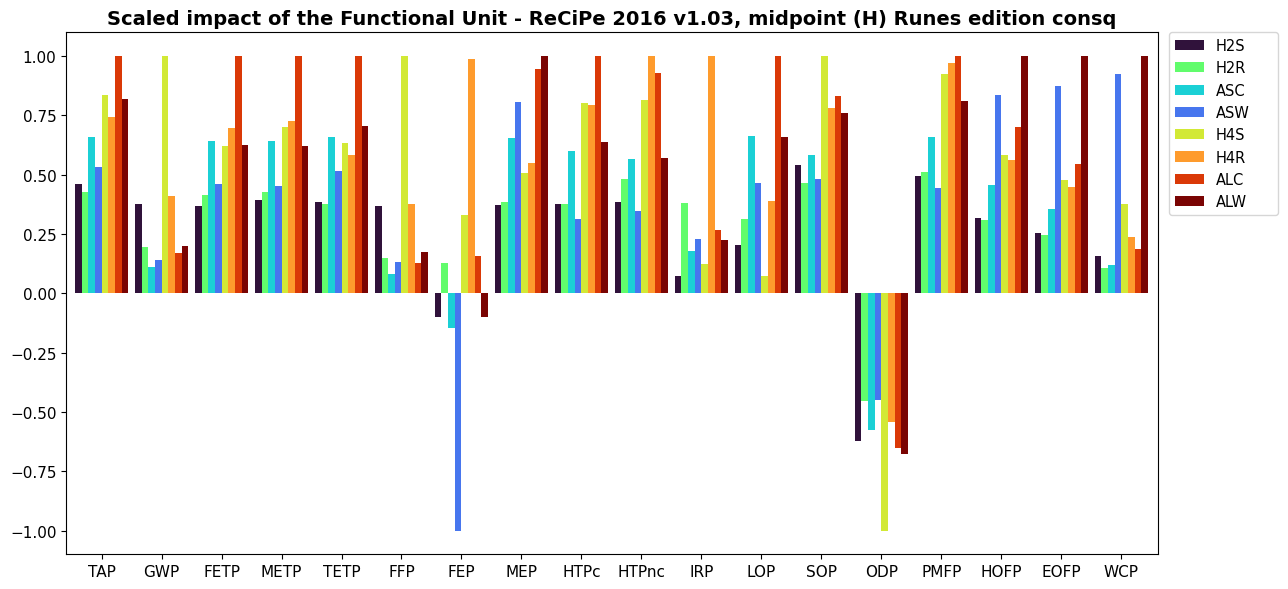

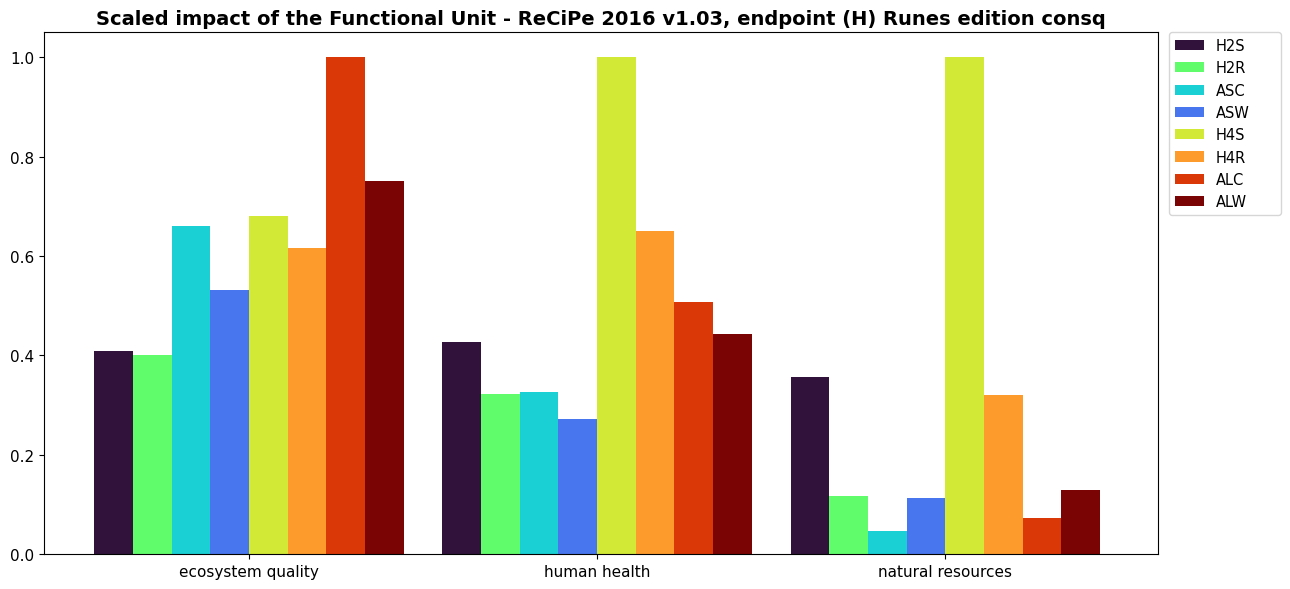

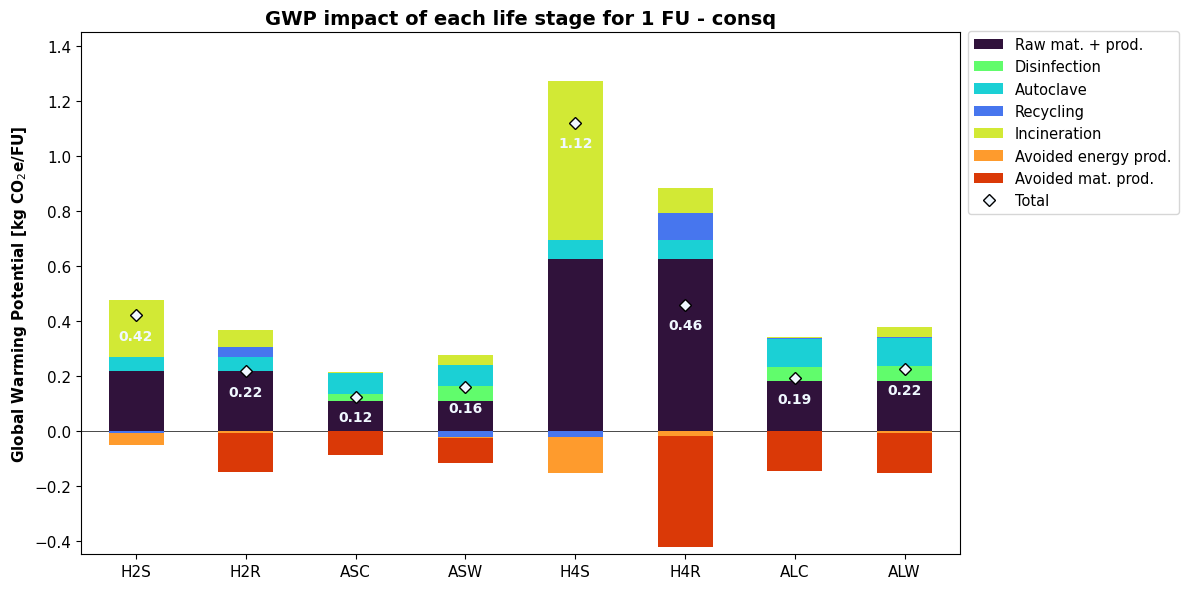

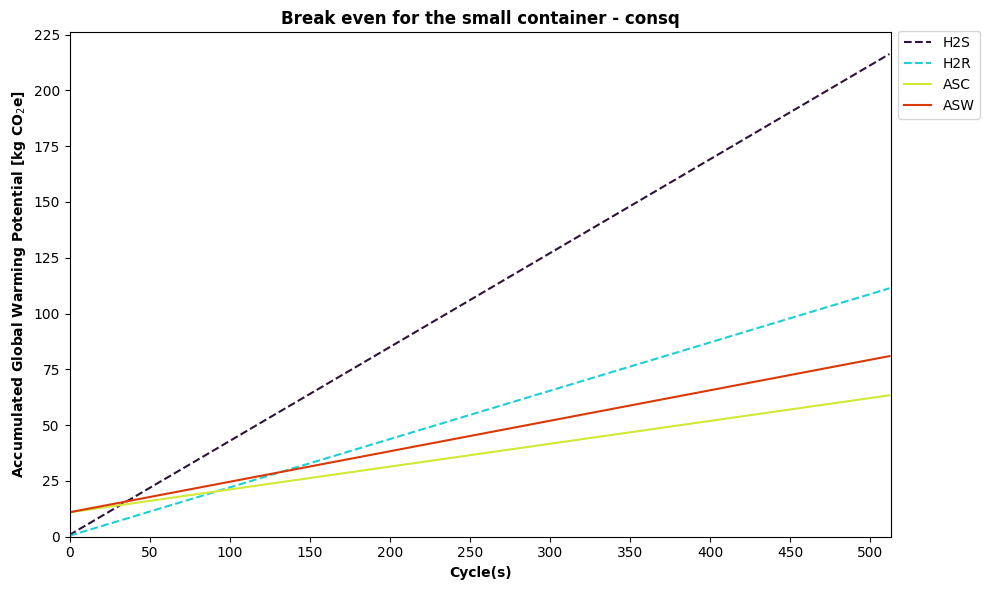

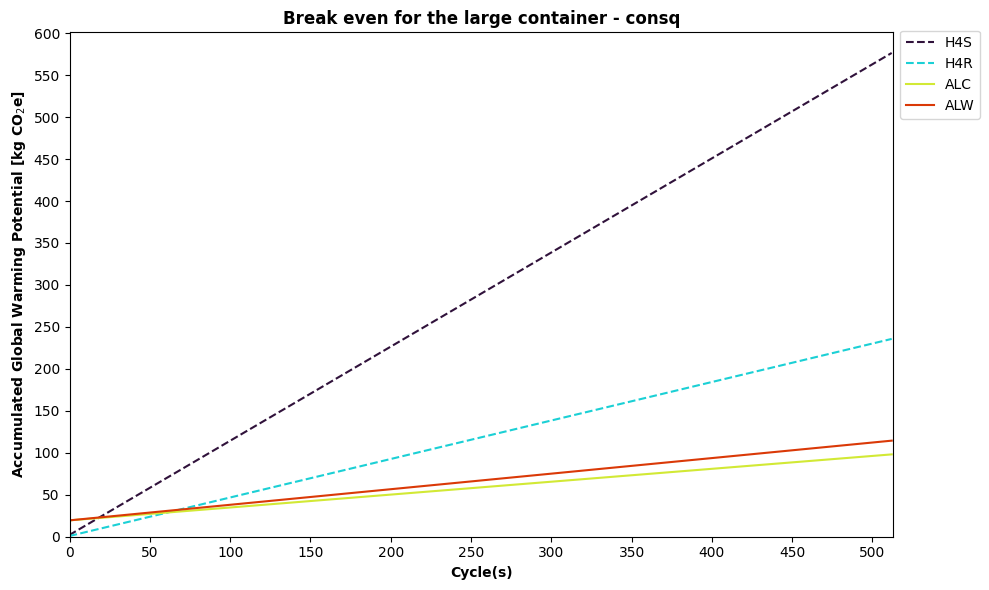

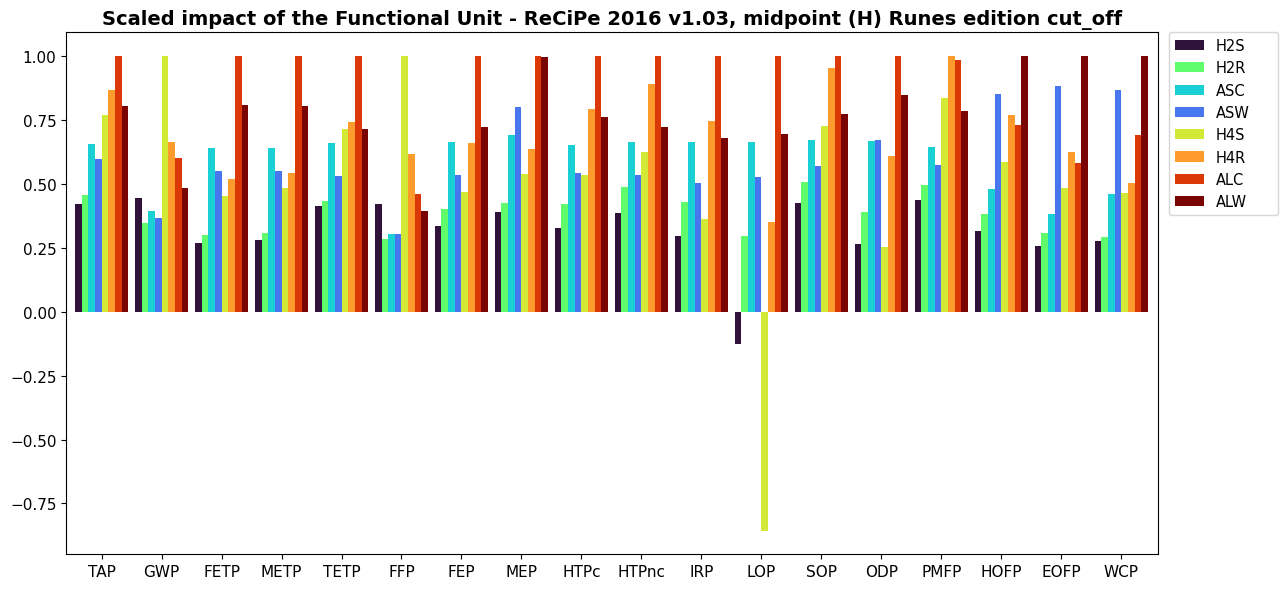

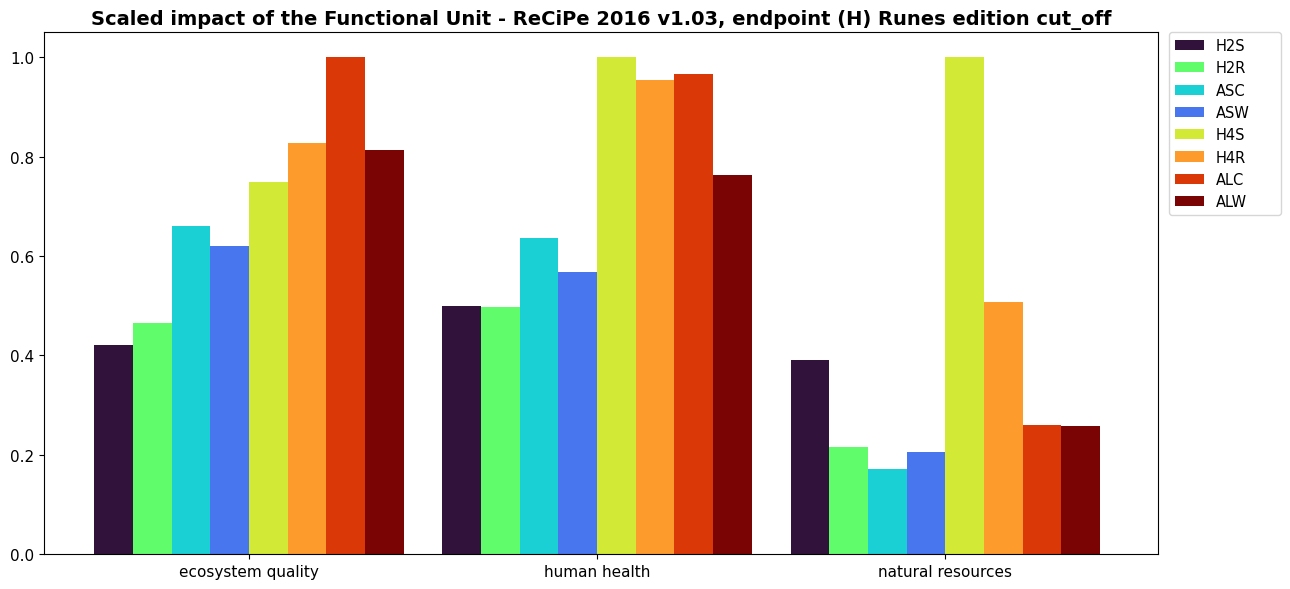

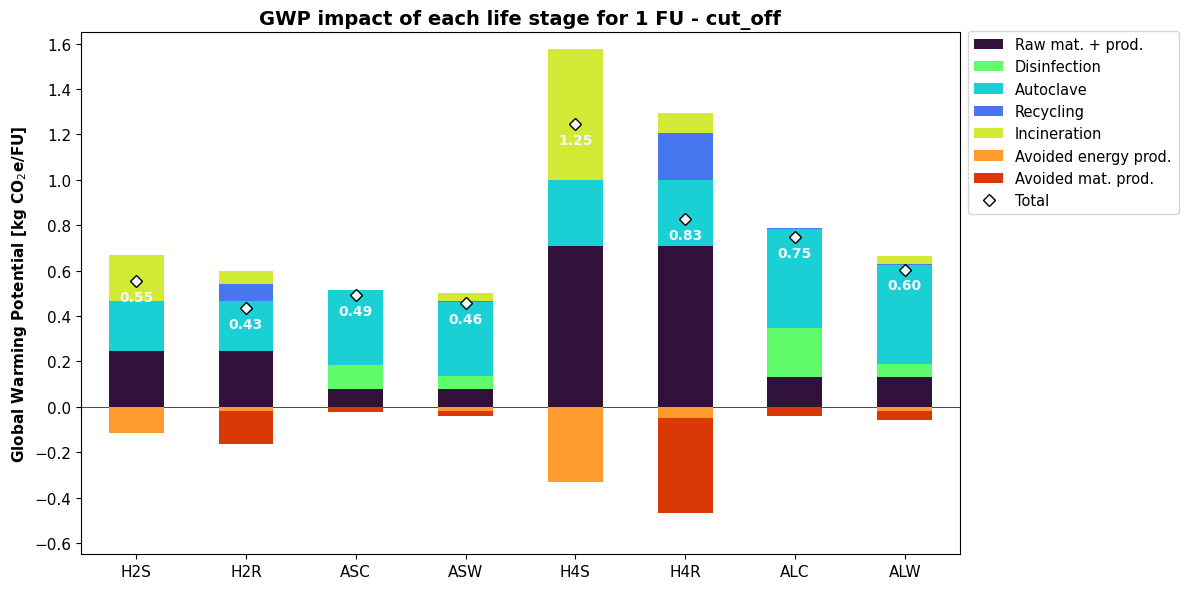

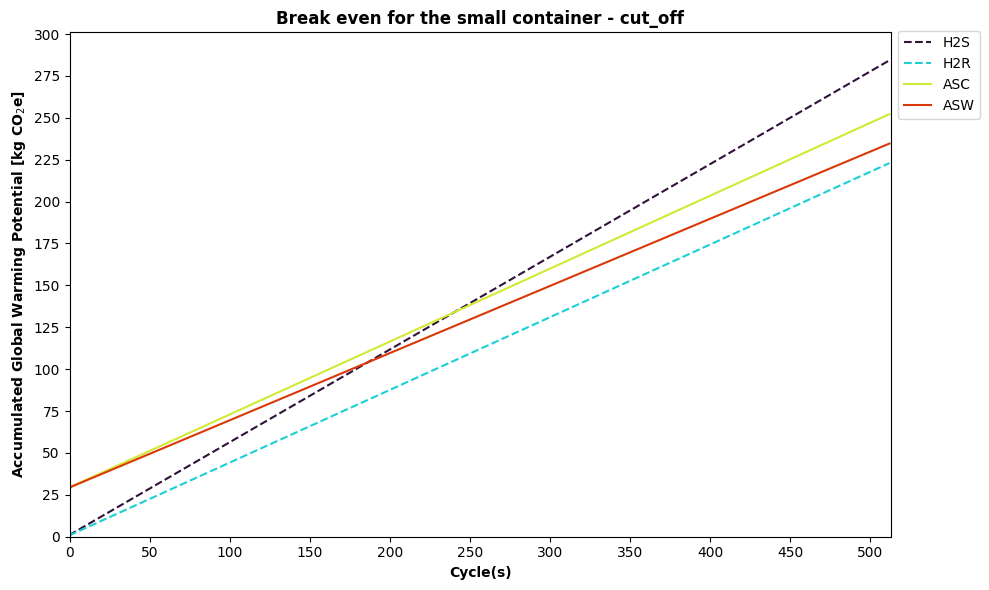

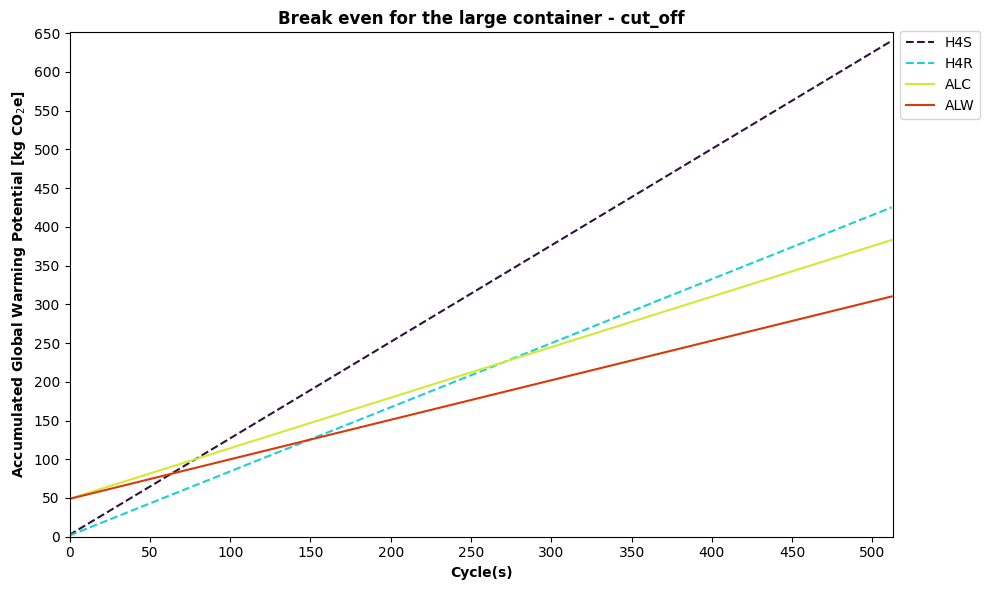

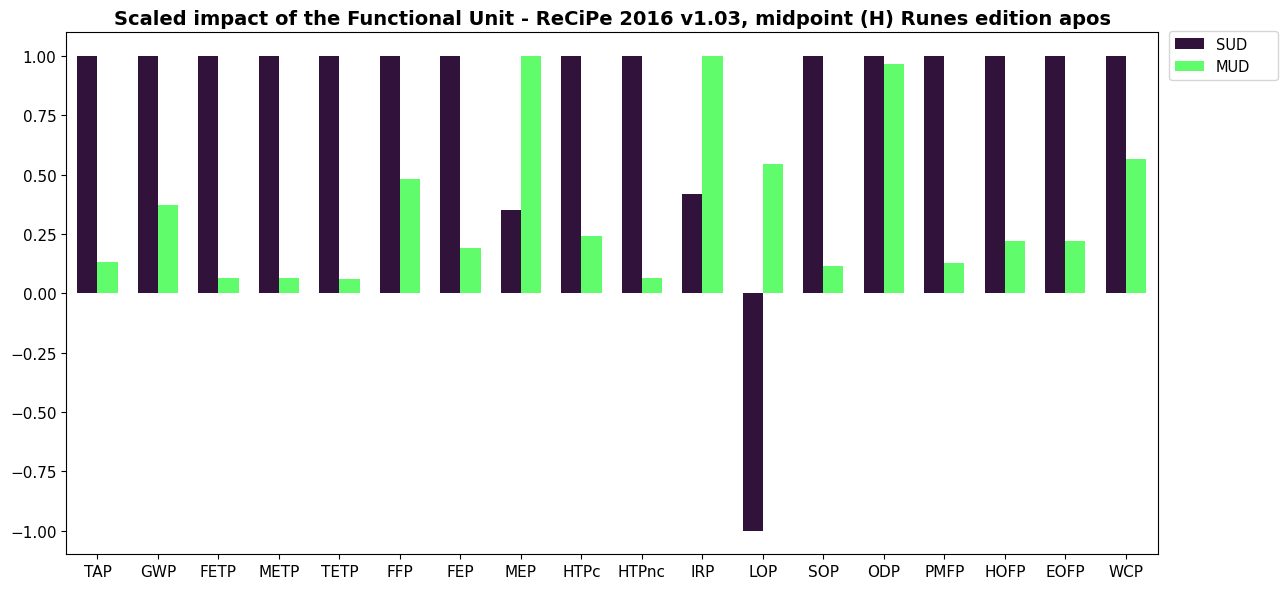

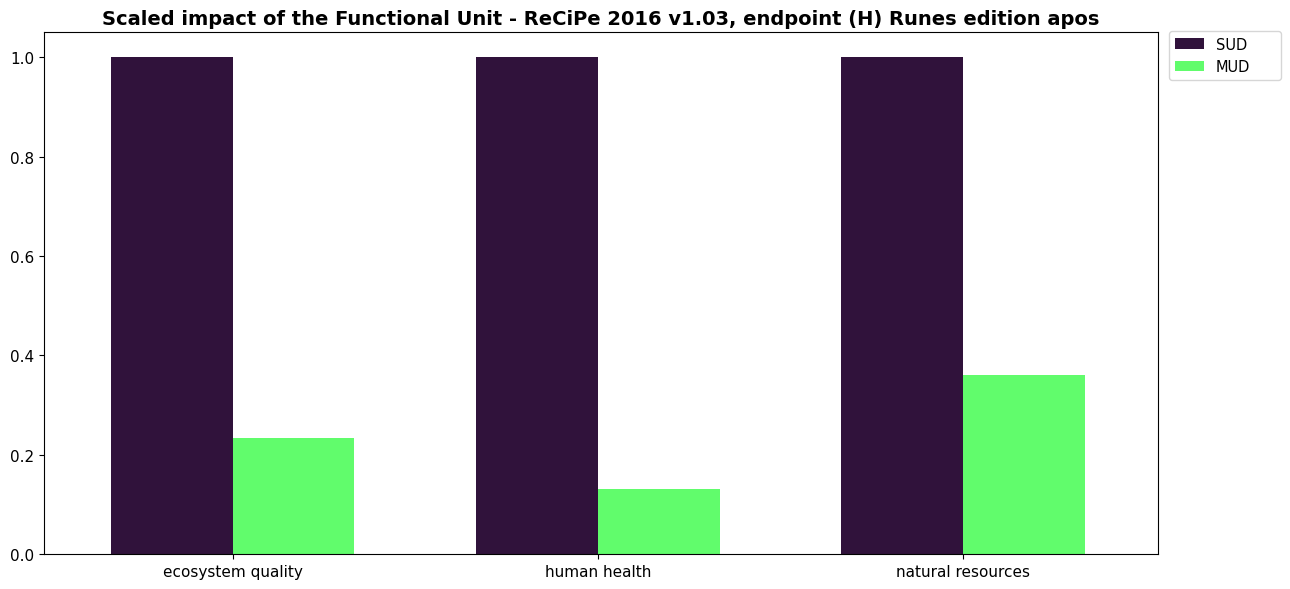

'H200 SU' (unit, GLO, None) 0.08762747544816313


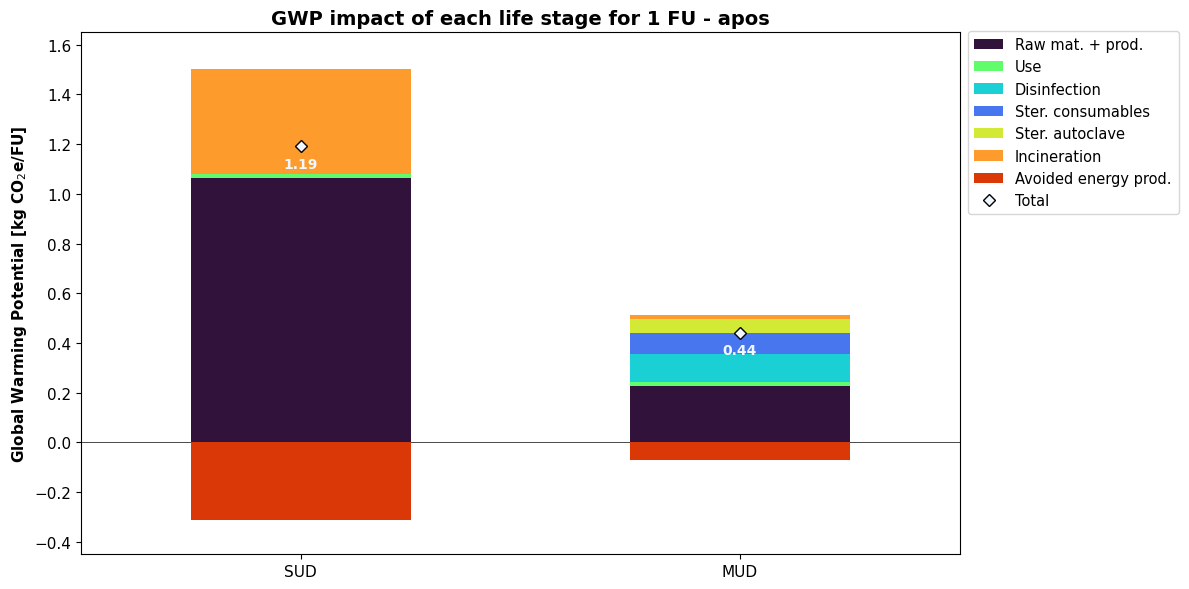

'H200 SU' (unit, GLO, None) 0.08762747544816313


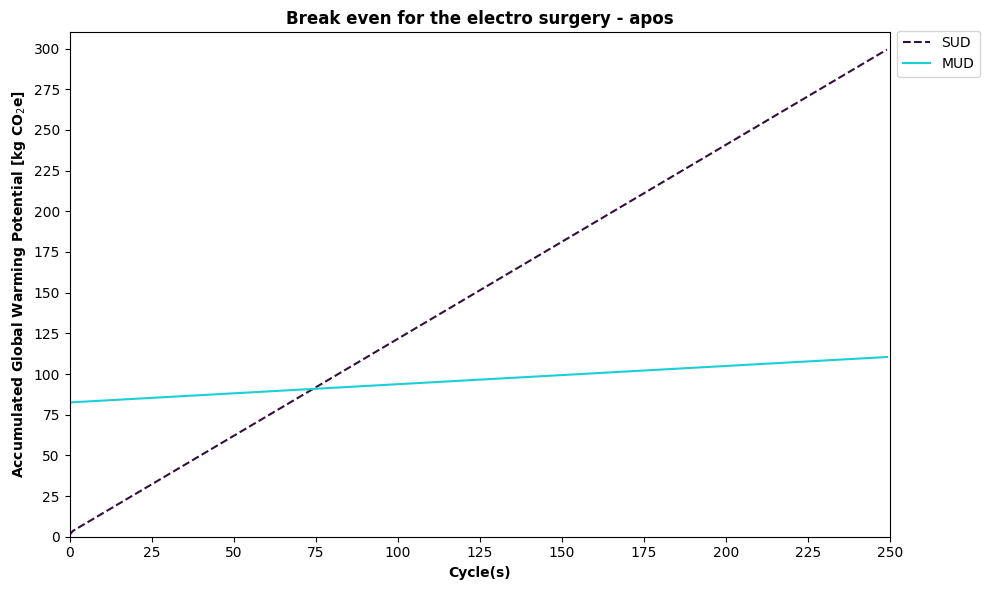

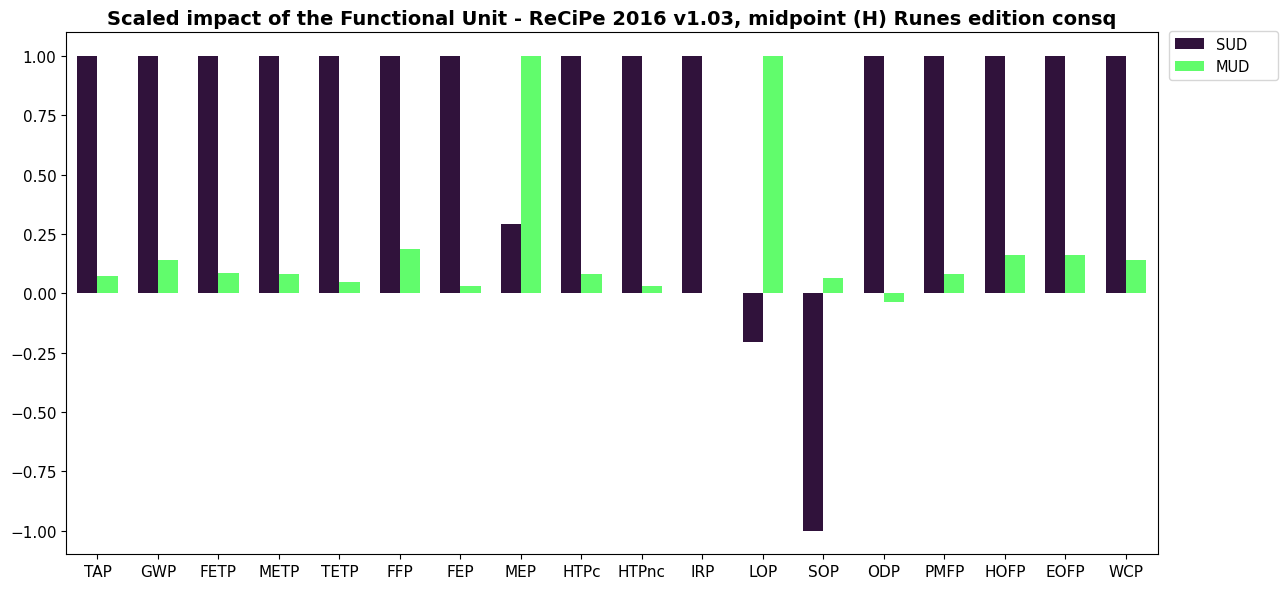

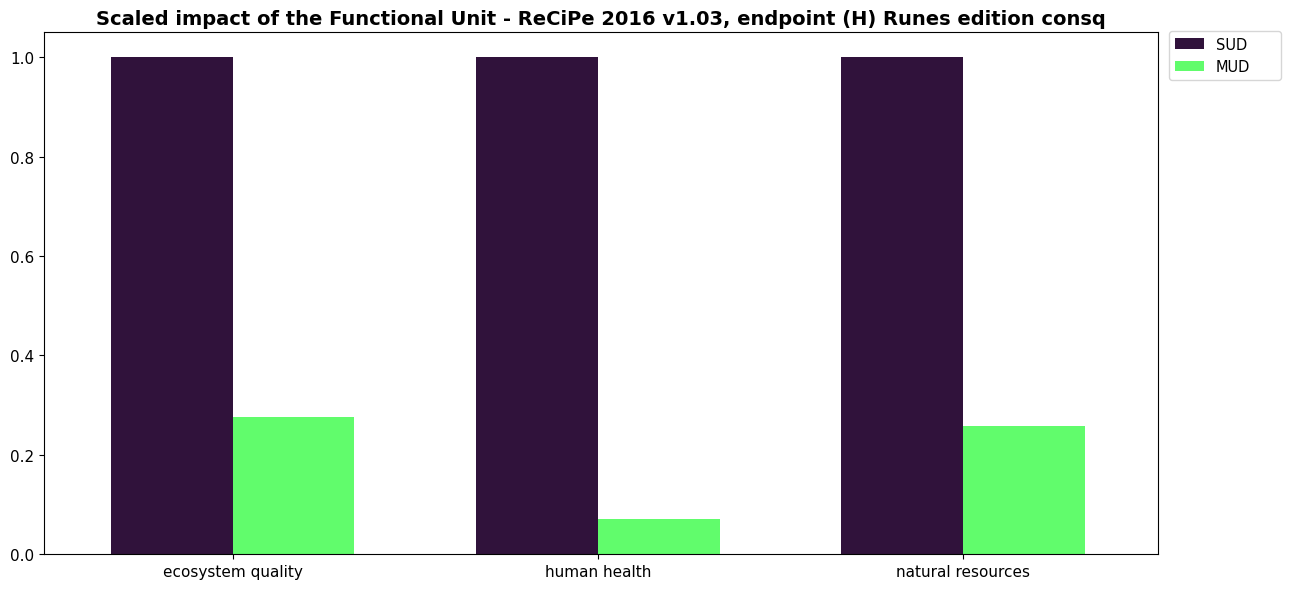

'H200 SU' (unit, GLO, None) 0.09237208958707463


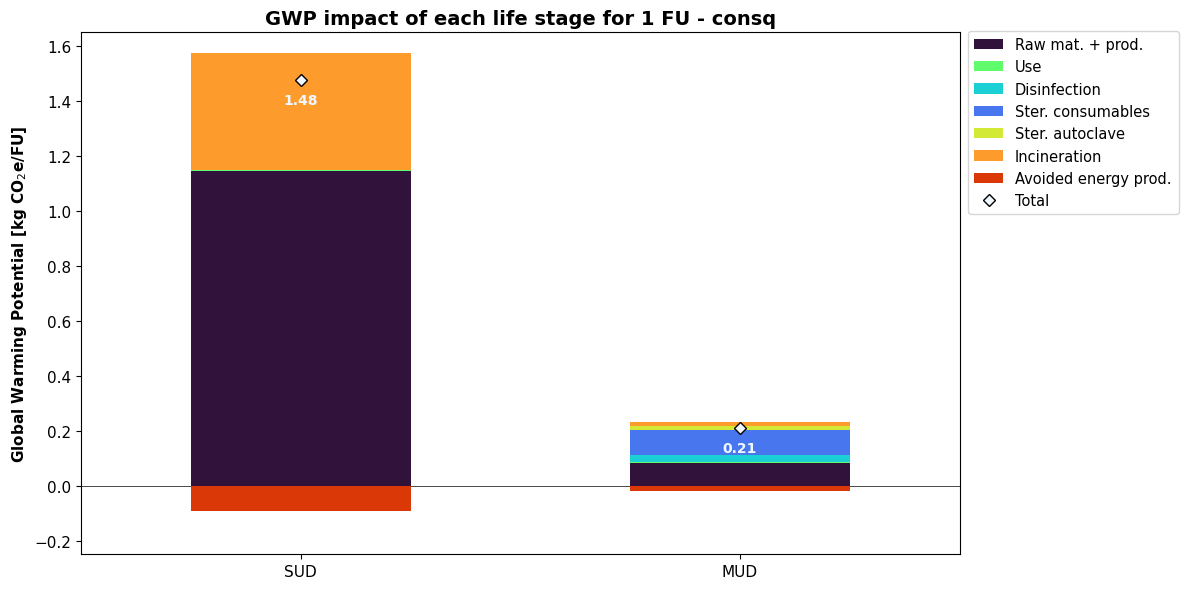

'H200 SU' (unit, GLO, None) 0.09237208958707463


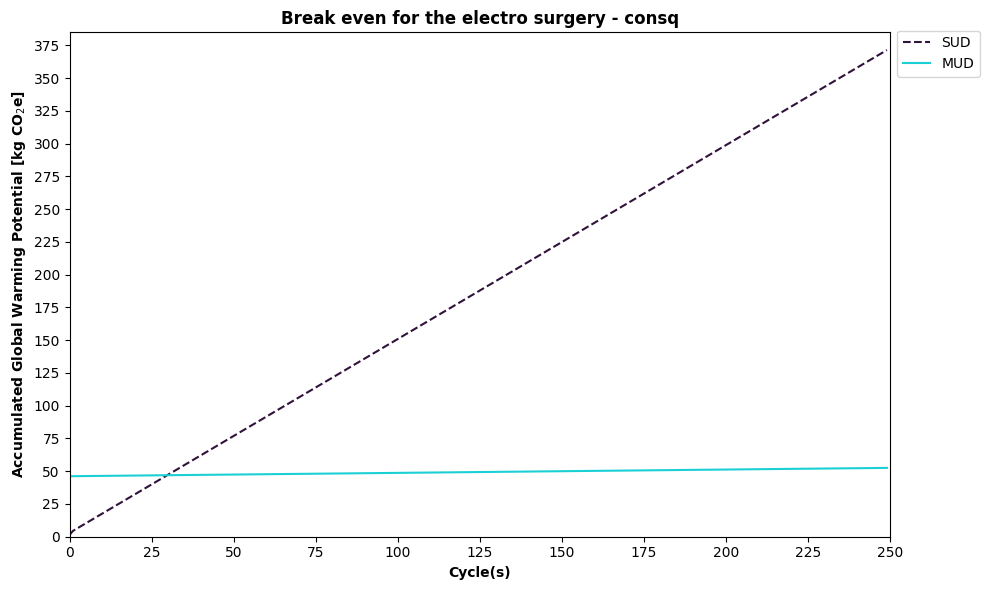

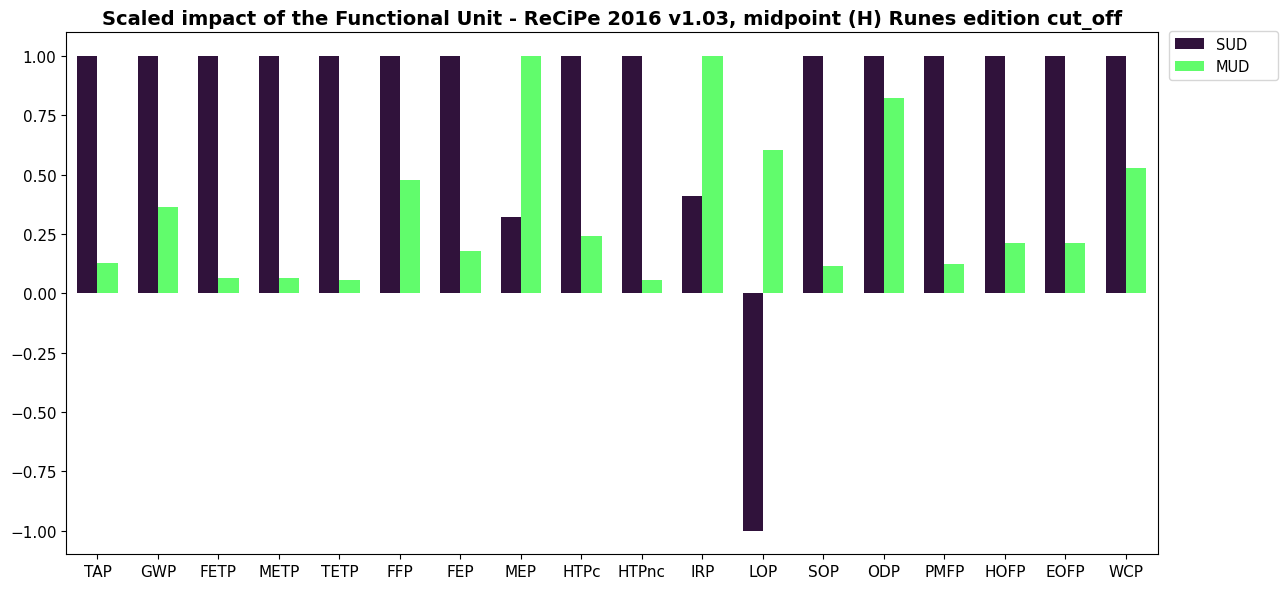

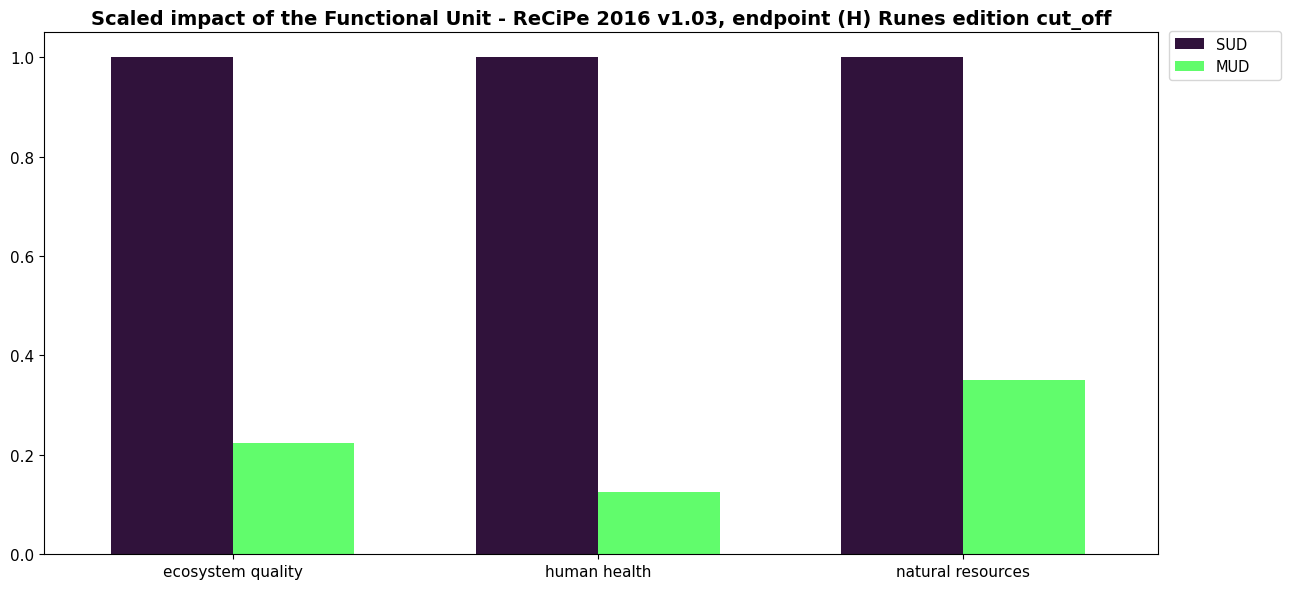

'H200 SU' (unit, GLO, None) 0.0838242699089274


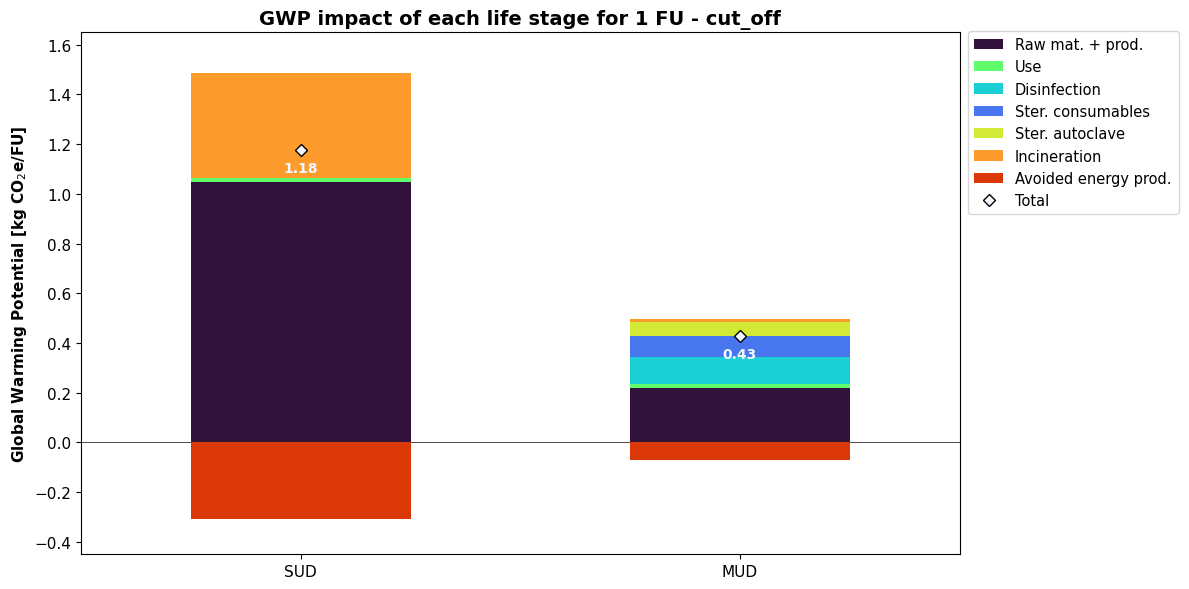

'H200 SU' (unit, GLO, None) 0.0838242699089274


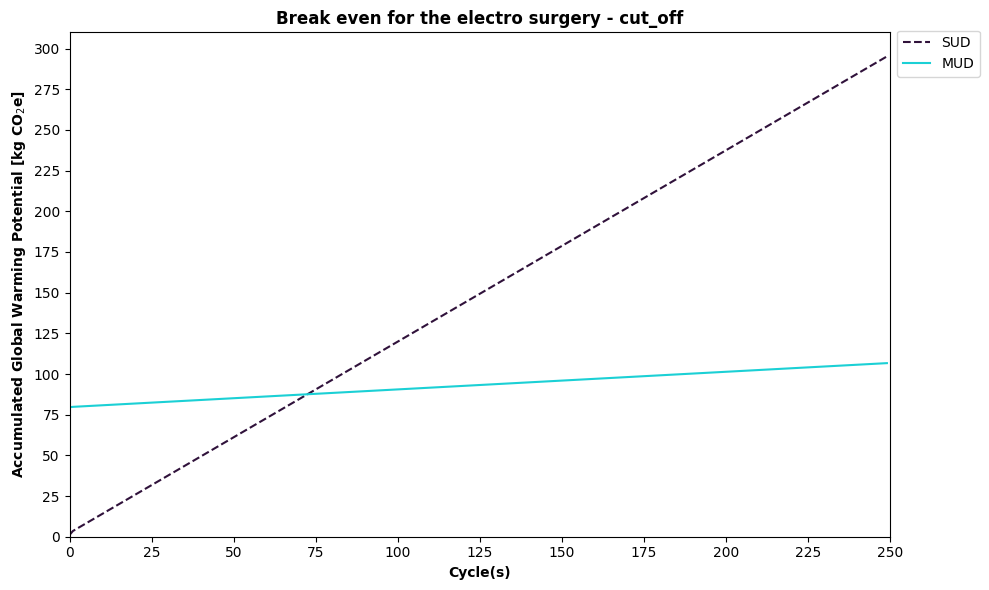

In [125]:
rl.reload_lib(lib)



lp.create_results_graphs(initialization, df, plot_x_axis_all, save_dir, impact_categories, flow_legend, plot_structure)